# Dota 2 Autoencoder and clustering analyzer

## Paths and Variables

In [1]:
from dota import Dota2
_patch = [55]
# Patch 7.35, professional matches, 30-120 minutes
_dota = Dota2(_patch, ['professional'], (30, 120))
dataset_path = "./tmp/dota_7_33_pro_30_120.csv"
metadata_path = "./tmp/dota_7_33_pro_30_120_metadata.json"
model_path = "./tmp/dota_7_33_pro_30_120_model.h5"
loss_path = "./tmp/dota_7_33_pro_30_120_losses.csv"
plot_path = "./tmp/dota_7_33_pro_30_120_plot.png"
report_path = "./tmp/dota_7_33_pro_30_120_report.txt"

Inicializando Dota2 Autoencoder...
Carregando dataset...
Tier: ['professional'], Duração: 30-120 minutos
Patches:
Patch 7.35 (55): 6133 partidas


## Load Dataset

In [3]:
dataset, _ = _dota.load_or_prepare_dataset(dataset_path, metadata_path)
train_df, val_df, test_df = _dota.prepare_data_splits(dataset, 1.0)

Carregando ou preparando o dataset...
Dataset já carregado do arquivo.


# Autoencoder

## Architecture

In [4]:
_dota.print_architecture()

Arquitetura do Dota2 Autoencoder:
Dimensão de embedding (picks de heróis): 8
Dimensão de embedding (roles de heróis): 4
Dimensão latente: 2
Arquitetura: [128, 32, 2, 32, 128]


## Train/Load Autoencoder

### Default Autoencoder

Iniciando treinamento do Dota2 Autoencoder...
Tamanho dos dados de treino: 2535, Tamanho dos dados de validação: 507, Tamanho dos dados de teste: 507
Total de estatísticas de heróis: 24, Total de estatísticas de jogadores: 25
Treinando Dota2 Autoencoder...
Iniciando treinamento do modelo com 100 épocas
Epoch 1/100, Loss: 21.0017, Val Loss: 3.6411
Epoch 10/100, Loss: 5.4876, Val Loss: 1.0073
Epoch 20/100, Loss: 1.5820, Val Loss: 0.2881
Epoch 30/100, Loss: 0.4558, Val Loss: 0.0806
Epoch 40/100, Loss: 0.1171, Val Loss: 0.0190
Epoch 50/100, Loss: 0.0261, Val Loss: 0.0036
Epoch 60/100, Loss: 0.0063, Val Loss: 0.0005
Epoch 70/100, Loss: 0.0025, Val Loss: 0.0002
Early stopping ativado após 80 épocas.
Epoch 80/100, Loss: 0.0032, Val Loss: 0.0001
Histórico de loss salvo em ./tmp/dota_7_33_pro_30_120_losses.csv
Modelo salvo em ./tmp/dota_7_33_pro_30_120_model.h5 e histórico de perda salvo em ./tmp/dota_7_33_pro_30_120_losses.csv.
Treinamento concluído.
Iniciando teste do Dota2 Autoencoder...
Tam

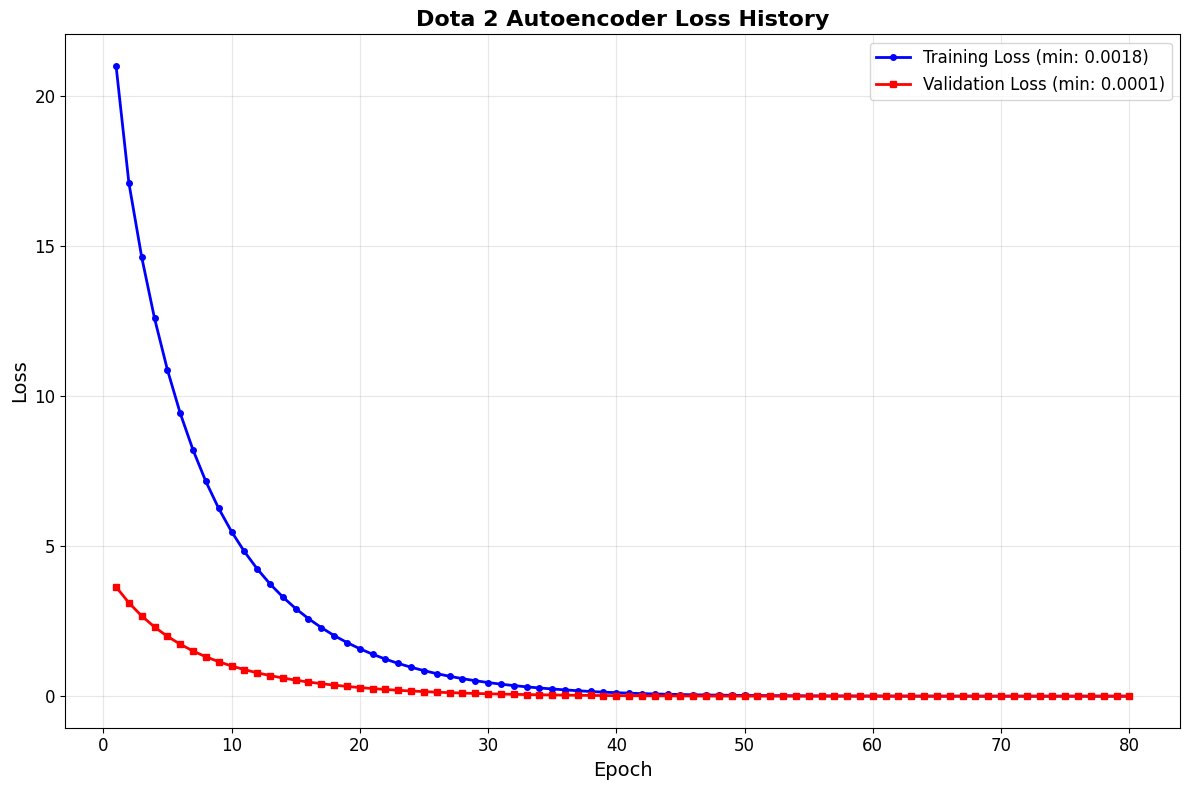

In [5]:
_dota.train_autoencoder(train_df, val_df, test_df, model_path, loss_path, epochs=100)
_dota.test_autoencoder(test_df)
_dota.save_report(train_df, val_df, test_df, _patch, 0.1, report_path, loss_path, plot_path)
print("Model trained and saved to", model_path)